After creating these CSV files, you will then perform exploratory data analysis on the data file that describes historical yearly weather data and crop output. As exploratory data analysis should entail a variety of data visualizations to determine patterns and relationships, we welcome you to perform your own EDA to determine trends.

At the minimum, however, you should be generating visualizations that explore the following questions and patterns:

* How have harvest outcomes changed for Minas Gerais throughout the years?  
    * Are these harvest outcomes similar to other regions in Brazil?  
    * Which region produces the most coffee (by sub-category) in Brazil?  
* How has unemployment changed in the various coffee-producing regions of Brazil?  
* How have weather outcomes changed for Minas Gerais throughout the years?  

For each of these questions and subsequent visualizations, be sure to include a markdown block in your jupyter notebook explaining which trends you see.

To form visualizations that answer these analytical questions, utilize your knowledge of appropriate visualizations for categorical and quantitative variables.

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
minas_df = pd.read_csv("/Users/sa17/Desktop/projects/projects/weather_api/data/csv/mg_yearly_medians.csv")

minas_df 

,year,subdivision,million_60kgs_bag,nonbear_mill_trees,bear_mill_trees,avg_unemp_perc,temperature,relative humidity,precipitation,surface pressure
0,2022,Minas Gerais,24.5,1500.0,6010.0,7.15,18.6,78.0,0.0,911.4
1,2023,Minas Gerais,28.5,1510.0,6100.0,NaN,20.7,78.0,0.0,913.4


In [133]:
br_df = pd.read_csv("/Users/sa17/Desktop/projects/projects/weather_api/data/csv/br_final.csv")

br_df = pd.DataFrame(br_df)[["year","subdivision", "million_60kgs_bag", "nonbear_mill_trees", "bear_mill_trees","avg_unemp_perc"]]

br_df

,year,subdivision,million_60kgs_bag,nonbear_mill_trees,bear_mill_trees,avg_unemp_perc
0,2002,Minas Gerais,16.2,1500.0,4465.0,NaN
1,2002,Espirito Santo,2.2,1500.0,4465.0,NaN
2,2002,Espirito Santo,7.5,1500.0,4465.0,NaN
3,2002,Sao Paulo,3.2,1500.0,4465.0,NaN
4,2002,Parana,0.5,1500.0,4465.0,6.95
...,...,...,...,...,...,...
110,2023,Minas Gerais,28.5,1510.0,6100.0,NaN
111,2023,Espirito Santo,4.4,1510.0,6100.0,NaN
112,2023,Espirito Santo,16.6,1510.0,6100.0,NaN
113,2023,Sao Paulo,5.1,1510.0,6100.0,NaN


In [134]:
br_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                115 non-null    int64  
 1   subdivision         115 non-null    object 
 2   million_60kgs_bag   115 non-null    float64
 3   nonbear_mill_trees  110 non-null    float64
 4   bear_mill_trees     110 non-null    float64
 5   avg_unemp_perc      67 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 5.5+ KB


How have harvest outcomes changed for Minas Gerais throughout the years?  

In [158]:
mg_harvest = br_df[br_df["subdivision"] == "Minas Gerais"]
    
mg_harvest = mg_harvest.iloc[:, [0, 1, 3, 4]]

mg_harvest.set_index("year", inplace=True)

mg_harvest = mg_harvest.dropna()

mg_harvest 

,subdivision,nonbear_mill_trees,bear_mill_trees
year,,,
2002,Minas Gerais,1500.0,4465.0
2003,Minas Gerais,1125.0,5265.0
2004,Minas Gerais,631.0,5050.0
2005,Minas Gerais,466.0,5255.0
2006,Minas Gerais,581.0,5330.0
2007,Minas Gerais,563.0,5730.0
2008,Minas Gerais,679.0,5720.0
2009,Minas Gerais,663.0,5770.0
2010,Minas Gerais,873.0,5725.0


<Axes: xlabel='year'>

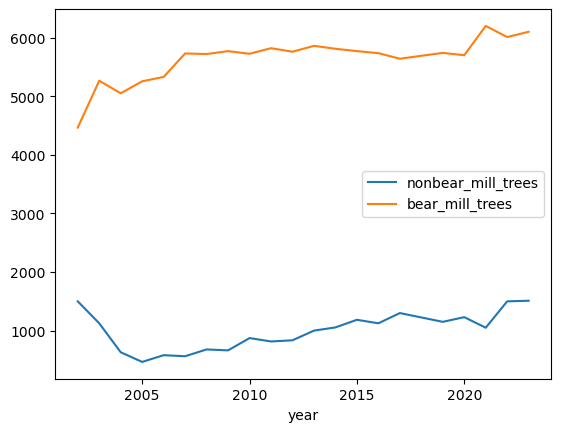

In [159]:
mg_harvest.plot.line()

 Are these harvest outcomes similar to other regions in Brazil? 

In [143]:
br_harvest = br_df.iloc[:, [0, 1, 3, 4]]

br_harvest = br_harvest.dropna()

br_harvest

,year,subdivision,nonbear_mill_trees,bear_mill_trees
0,2002,Minas Gerais,1500.0,4465.0
1,2002,Espirito Santo,1500.0,4465.0
2,2002,Espirito Santo,1500.0,4465.0
3,2002,Sao Paulo,1500.0,4465.0
4,2002,Parana,1500.0,4465.0
...,...,...,...,...
110,2023,Minas Gerais,1510.0,6100.0
111,2023,Espirito Santo,1510.0,6100.0
112,2023,Espirito Santo,1510.0,6100.0
113,2023,Sao Paulo,1510.0,6100.0


<Axes: xlabel='subdivision', ylabel='nonbear_mill_trees'>

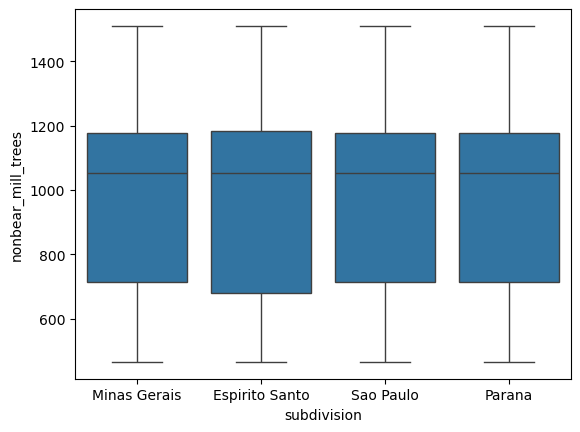

In [144]:
sns.boxplot(data=br_harvest, x="subdivision", y="nonbear_mill_trees")

<Axes: xlabel='subdivision', ylabel='bear_mill_trees'>

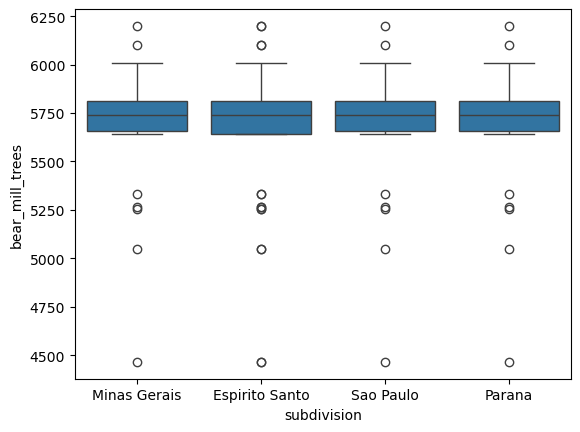

In [145]:
sns.boxplot(data=br_harvest, x="subdivision", y="bear_mill_trees")